## Modelos lineales para clasificación 

Nombre y apellido:

### Ejercicio 


Cargue y procese previamente los datos `adult`. Incluye [dummy encoding](https://towardsdatascience.com/a-data-scientists-toolkit-to-encode-categorical-variables-to-numeric-d17ad9fae03f) y [scaling](https://benalexkeen.com/feature-scaling-with-scikit-learn/). Aprenda un modelo de regresión logística y visualice los coeficientes. Encuentre con búsqueda grid un parámetro de regularización C. Compara la penalización L1 con la penalización L2. ¿En qué se diferencian los coeficientes?. ¿Cuáles son las características más importantes?

In [ ]:
import pandas as pd
pd.read_csv("datos/adult.csv", index_col=0)

In [ ]:
## Tu solucion

In [1]:
import pandas as pd
data = pd.read_csv("datos/adult.csv", index_col=0)
data.head()

income = data.income
data_features = data.drop("income", axis=1)

display(data_features.head())

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Técnica: one-hot encode

In [2]:
data_one_hot = pd.get_dummies(data_features)
data_one_hot.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Preprocesamiento

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

### Validacion cruzada con parametros por defecto
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train_scaled, y_train)
print(scores.mean())

0.8504504504504503


Búsqueda Grid

In [4]:
import numpy as np

param_grid = {'C': np.logspace(-3, 3, 7)}
param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid,
                    return_train_score=True)

grid.fit(X_train_scaled, y_train)

grid.best_params_
grid.best_score_

/home/cesarlara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8505733005733006

Visualización

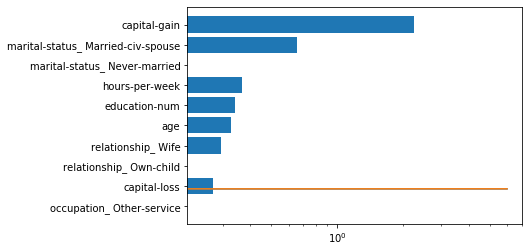

In [5]:
import pandas as pd
%matplotlib inline
res = pd.DataFrame(grid.cv_results_)
res.mean_test_score.plot()
res.mean_train_score.plot()
import matplotlib.pyplot as plt
plt.xscale("log")

grid.score(X_test, y_test)

par1 = np.argsort(np.abs(grid.best_estimator_.coef_)).ravel()

plt.barh(range(10), grid.best_estimator_.coef_.ravel()[par1[-10:]])
plt.yticks(range(10), X_train.columns[par1[-10:]]);